project

In [17]:
!pip install matplotlib seaborn

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
df_train= pd.read_csv("train.csv")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27676 entries, 0 to 27675
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     27676 non-null  int64  
 1   Age                             27541 non-null  float64
 2   Employment_Type                 27388 non-null  object 
 3   A                               27676 non-null  int64  
 4   Education_Level                 27676 non-null  object 
 5   Years_of_Education              27122 non-null  float64
 6   Marital_Status                  27676 non-null  object 
 7   Job_Type                        25729 non-null  object 
 8   Household_Role                  27676 non-null  object 
 9   Ethnicity                       24912 non-null  object 
 10  Gender                          27676 non-null  object 
 11  Investment_Gain                 26846 non-null  float64
 12  Investment_Loss                 

In [40]:
df_train.head()

,customer_id,Age,Employment_Type,A,Education_Level,Years_of_Education,Marital_Status,Job_Type,Household_Role,Ethnicity,...,Investment_Gain,Investment_Loss,Weekly_Work_Hours,Country_of_Residence,C,Preferred_Communication_Method,D,B,E,Loan_Approval
0,115892,90.0,?,77053,HS-grad,9.0,Widowed,?,Not-in-family,White,...,0.0,4356.0,40,United-States,104.906221,Phone_Call,2.865629,NaN,170.887465,0
1,115893,82.0,Private,132870,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,...,0.0,4356.0,18,United-States,96.358501,mail,5.528583,NaN,156.630201,0
2,115895,54.0,Private,140359,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,...,0.0,3900.0,40,United-States,115.529631,mail,3.816915,NaN,165.635557,0
3,115896,41.0,Private,264663,Some-college,10.0,Separated,Prof-specialty,Own-child,White,...,0.0,3900.0,40,United-States,85.732506,NaN,5.416363,NaN,123.379007,0
4,115897,34.0,Private,216864,HS-grad,9.0,Divorced,Other-service,Unmarried,White,...,NaN,3770.0,45,United-States,115.218443,Mail,6.453932,NaN,155.262131,0


In [42]:
df_train.shape

(27676, 21)

In [26]:
df_train.describe()

,customer_id,Age,A,Years_of_Education,Investment_Gain,Investment_Loss,Weekly_Work_Hours,C,D,B,E,Loan_Approval
count,27676.000000,27541.000000,2.767600e+04,27122.000000,26846.000000,27647.000000,27676.000000,26561.000000,27676.000000,0.0,24389.000000,27676.000000
mean,132196.289854,38.597727,1.898849e+05,10.079972,1091.680101,86.084458,40.482151,99.957601,4.987450,NaN,139.251615,0.240786
std,9399.839425,13.636965,1.053593e+05,2.575332,7482.292675,400.504134,12.371156,9.911054,1.511751,NaN,13.708225,0.427569
min,115892.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,58.136513,-1.711896,NaN,82.675954,0.000000
25%,124043.750000,28.000000,1.177652e+05,9.000000,0.000000,0.000000,40.000000,93.273986,3.968762,NaN,129.783073,0.000000
50%,132222.500000,37.000000,1.785870e+05,10.000000,0.000000,0.000000,40.000000,99.903569,4.994815,NaN,139.078247,0.000000
75%,140322.500000,48.000000,2.376340e+05,12.000000,0.000000,0.000000,45.000000,106.636563,5.999440,NaN,148.488675,0.000000
max,148452.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,144.309842,10.876204,NaN,199.134411,1.000000


In [55]:
missing = df_train.isnull().sum()
missing_pct = (missing / len(df_train) * 100).round(2)
pd.DataFrame({
    "missing_count": missing,
    "missing_pct": missing_pct
}).query("missing_count > 0").sort_values("missing_count", ascending=False)

,missing_count,missing_pct
B,27676,100.00
E,3287,11.88
Ethnicity,2764,9.99
Job_Type,1947,7.03
C,1115,4.03
Preferred_Communication_Method,864,3.12
Investment_Gain,830,3.00
Years_of_Education,554,2.00
Employment_Type,288,1.04
Age,135,0.49


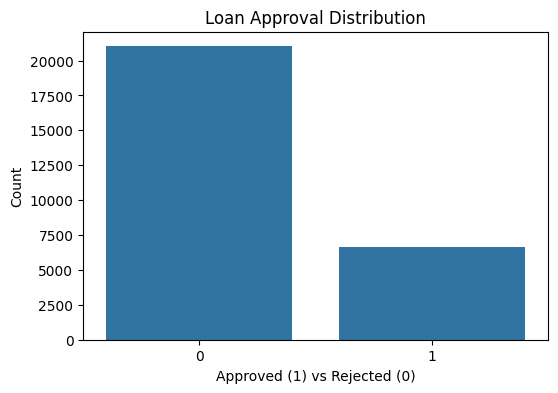

In [59]:
target = "Loan_Approval"

plt.figure(figsize=(6, 4))
sns.countplot(x=target, data=df_train)
plt.title("Loan Approval Distribution")
plt.xlabel("Approved (1) vs Rejected (0)")
plt.ylabel("Count")
plt.show()


=== Feature: Age ===
count    27541.00
mean        38.60
std         13.64
min         17.00
25%         28.00
50%         37.00
75%         48.00
max         90.00
Name: Age, dtype: float64
Pearson corr(Age, Loan_Approval): 0.23
Approval rate for Age ≤ median (37.0): 0.135
Approval rate for Age > median (37.0): 0.351


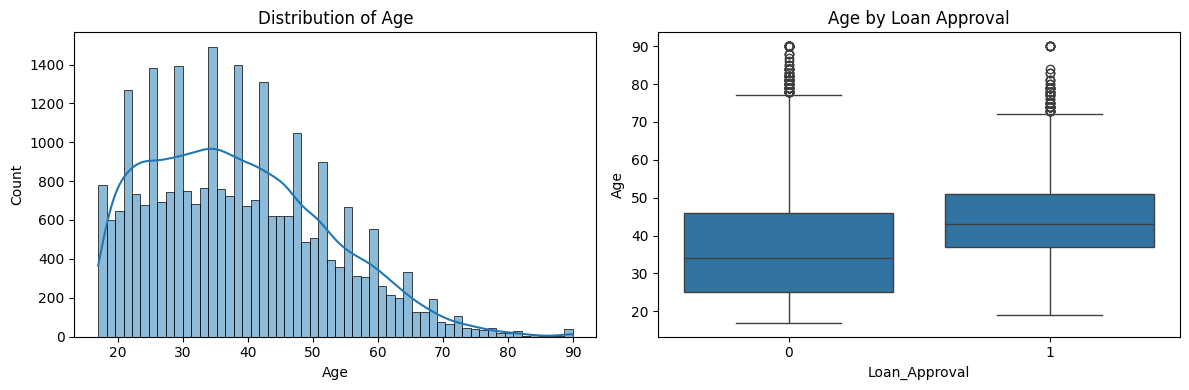


=== Feature: A ===
count      27676.00
mean      189884.88
std       105359.31
min        12285.00
25%       117765.25
50%       178587.00
75%       237634.00
max      1484705.00
Name: A, dtype: float64
Pearson corr(A, Loan_Approval): -0.01
Approval rate for A ≤ median (178587.0): 0.248
Approval rate for A > median (178587.0): 0.233


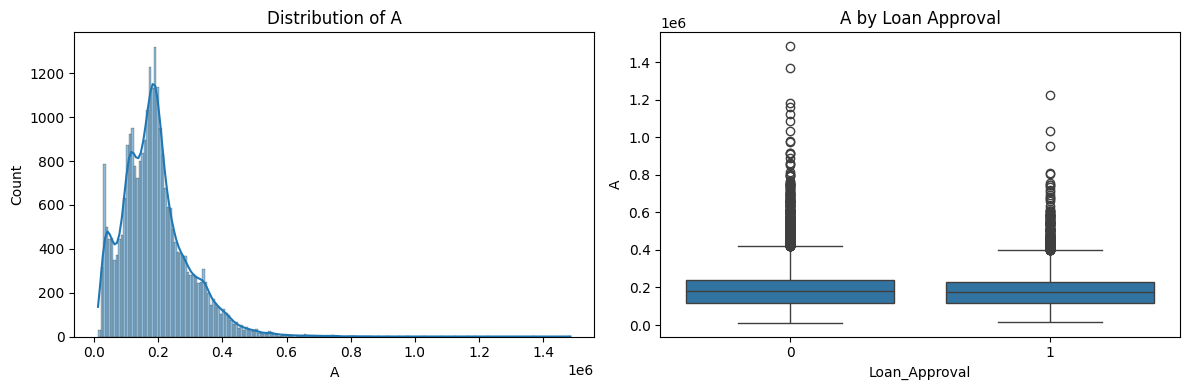


=== Feature: Years_of_Education ===
count    27122.00
mean        10.08
std          2.58
min          1.00
25%          9.00
50%         10.00
75%         12.00
max         16.00
Name: Years_of_Education, dtype: float64
Pearson corr(Years_of_Education, Loan_Approval): 0.34
Approval rate for Years_of_Education ≤ median (10.0): 0.151
Approval rate for Years_of_Education > median (10.0): 0.432


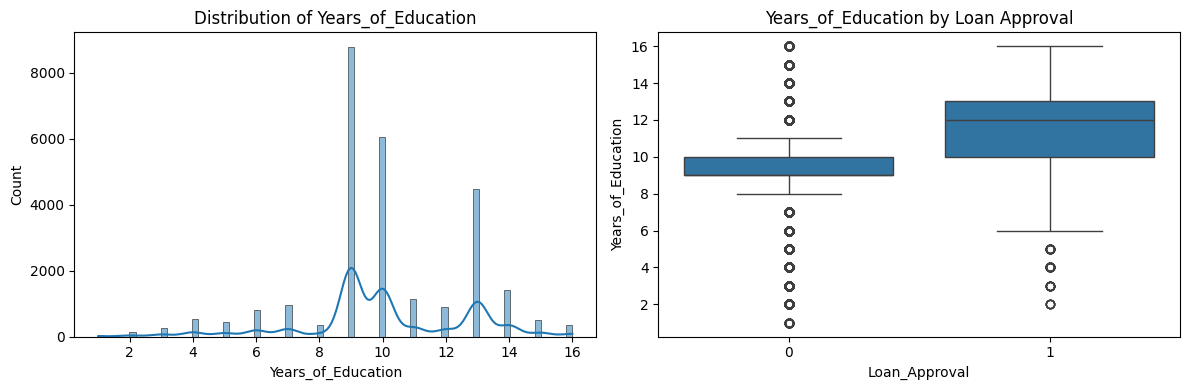


=== Feature: Investment_Gain ===
count    26846.00
mean      1091.68
std       7482.29
min          0.00
25%          0.00
50%          0.00
75%          0.00
max      99999.00
Name: Investment_Gain, dtype: float64
Pearson corr(Investment_Gain, Loan_Approval): 0.22
Approval rate for Investment_Gain ≤ median (0.0): 0.206
Approval rate for Investment_Gain > median (0.0): 0.617


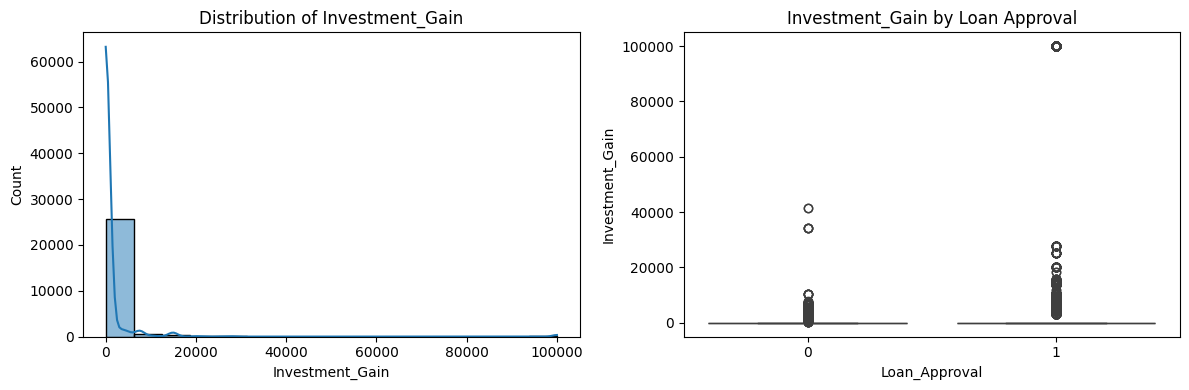


=== Feature: Investment_Loss ===
count    27647.00
mean        86.08
std        400.50
min          0.00
25%          0.00
50%          0.00
75%          0.00
max       4356.00
Name: Investment_Loss, dtype: float64
Pearson corr(Investment_Loss, Loan_Approval): 0.15
Approval rate for Investment_Loss ≤ median (0.0): 0.228
Approval rate for Investment_Loss > median (0.0): 0.512


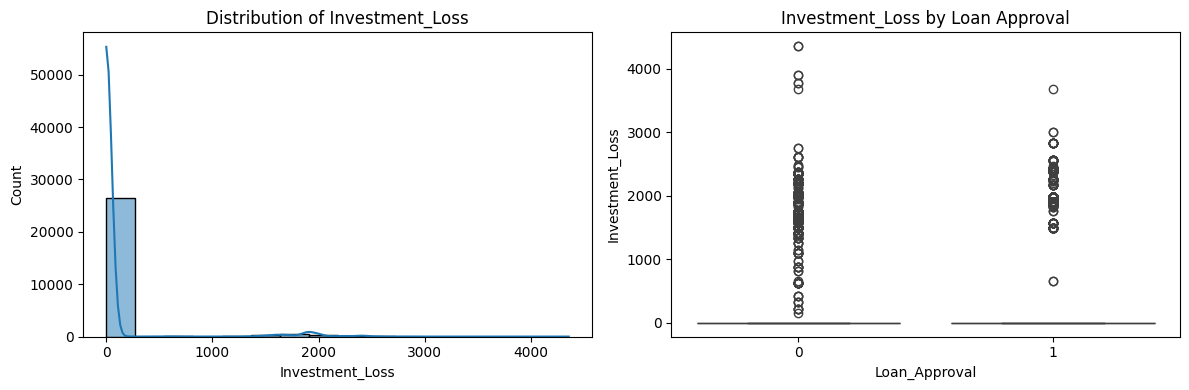


=== Feature: Weekly_Work_Hours ===
count    27676.00
mean        40.48
std         12.37
min          1.00
25%         40.00
50%         40.00
75%         45.00
max         99.00
Name: Weekly_Work_Hours, dtype: float64
Pearson corr(Weekly_Work_Hours, Loan_Approval): 0.23
Approval rate for Weekly_Work_Hours ≤ median (40.0): 0.174
Approval rate for Weekly_Work_Hours > median (40.0): 0.401


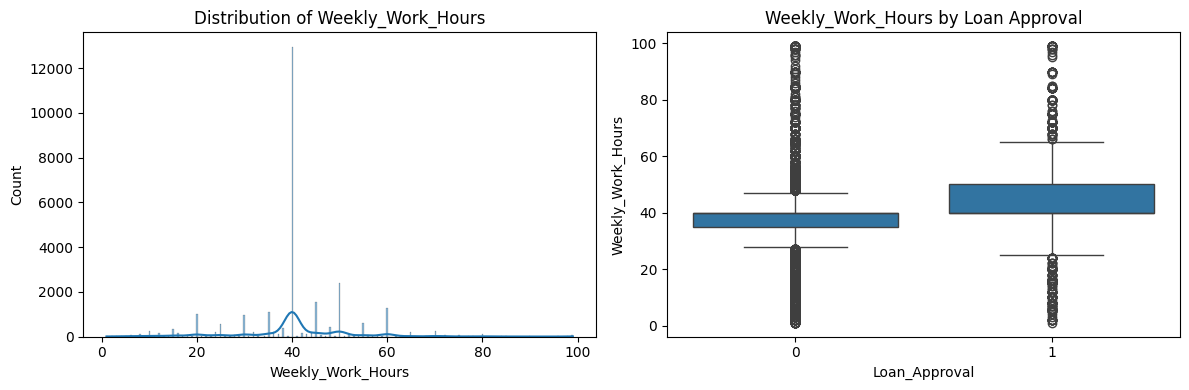


=== Feature: C ===
count    26561.00
mean        99.96
std          9.91
min         58.14
25%         93.27
50%         99.90
75%        106.64
max        144.31
Name: C, dtype: float64
Pearson corr(C, Loan_Approval): 0.01
Approval rate for C ≤ median (99.90356863113963): 0.236
Approval rate for C > median (99.90356863113963): 0.244


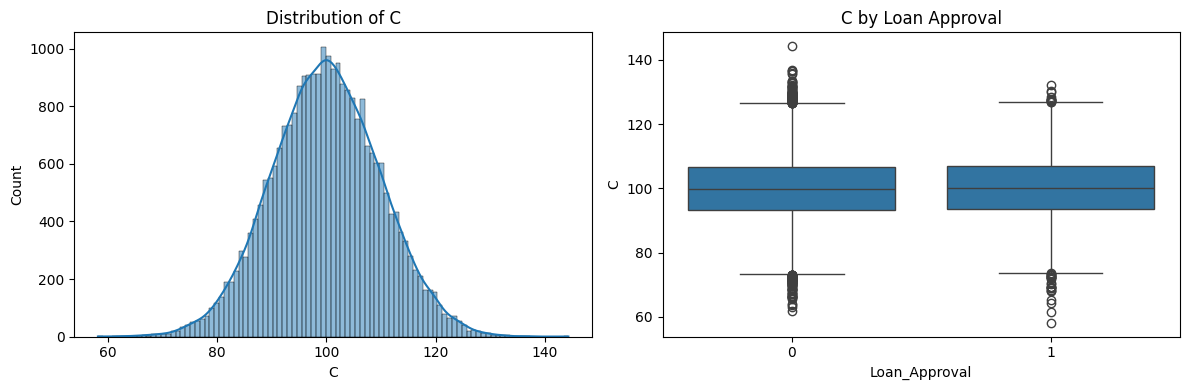


=== Feature: D ===
count    27676.00
mean         4.99
std          1.51
min         -1.71
25%          3.97
50%          4.99
75%          6.00
max         10.88
Name: D, dtype: float64
Pearson corr(D, Loan_Approval): 0.00
Approval rate for D ≤ median (4.994814679394775): 0.243
Approval rate for D > median (4.994814679394775): 0.238


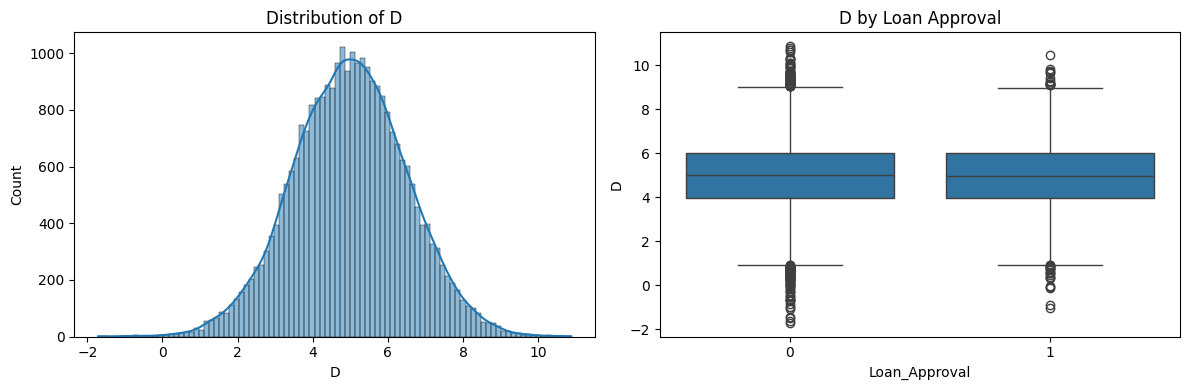

Skipping B: only one Loan Approval category present.

=== Feature: E ===
count    24389.00
mean       139.25
std         13.71
min         82.68
25%        129.78
50%        139.08
75%        148.49
max        199.13
Name: E, dtype: float64
Pearson corr(E, Loan_Approval): 0.12
Approval rate for E ≤ median (139.07824650394133): 0.192
Approval rate for E > median (139.07824650394133): 0.291


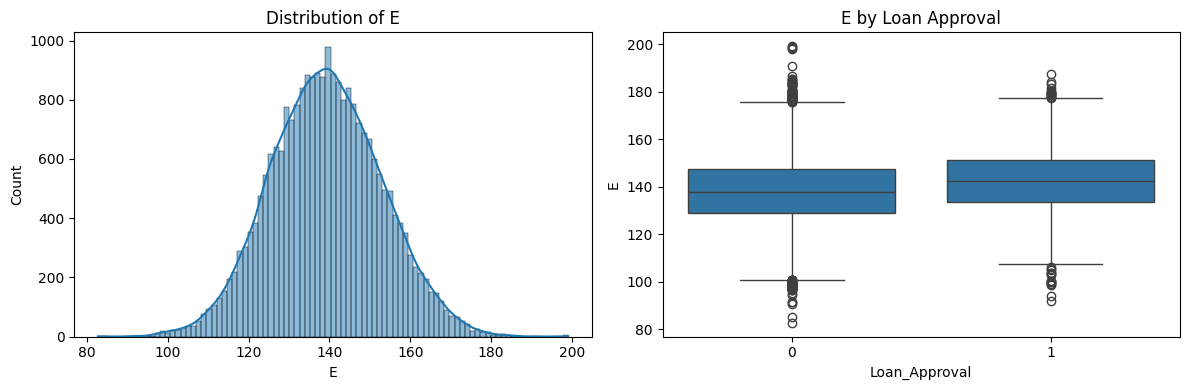

In [131]:
# %% [markdown]
# ## 6. Numeric Features: Distribution, Descriptive Stats & Approval Rates

# %%
# 1. Build list of numeric features (excluding ID & target)
num_cols = (
    df_train
    .select_dtypes(include=["int64", "float64"])
    .drop(columns=["customer_id", target])
    .columns
)

for col in num_cols:
    # 2. Prepare clean DataFrame for this feature
    df_plot = df_train[[target, col]].dropna()
    
    # 3. Skip if one approval class only
    if df_plot[target].nunique() < 2:
        print(f"Skipping {col}: only one Loan Approval category present.")
        continue

    # 4. Descriptive statistics
    print(f"\n=== Feature: {col} ===")
    print(df_plot[col].describe().round(2))
    
    # 5. Pearson correlation with target
    corr_val = df_plot[col].corr(df_plot[target])
    print(f"Pearson corr({col}, {target}): {corr_val:.2f}")

    # 6. Approval rate below/above median
    median_val = df_plot[col].median()
    low_rate  = df_plot[df_plot[col] <= median_val][target].mean()
    high_rate = df_plot[df_plot[col]  > median_val][target].mean()
    print(f"Approval rate for {col} ≤ median ({median_val}): {low_rate:.3f}")
    print(f"Approval rate for {col} > median ({median_val}): {high_rate:.3f}")

    # 7. Plot histogram + KDE and boxplot
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df_plot[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Distribution of {col}")
    sns.boxplot(x=target, y=col, data=df_plot, ax=axes[1])
    axes[1].set_title(f"{col} by Loan Approval")
    plt.tight_layout()
    plt.show()


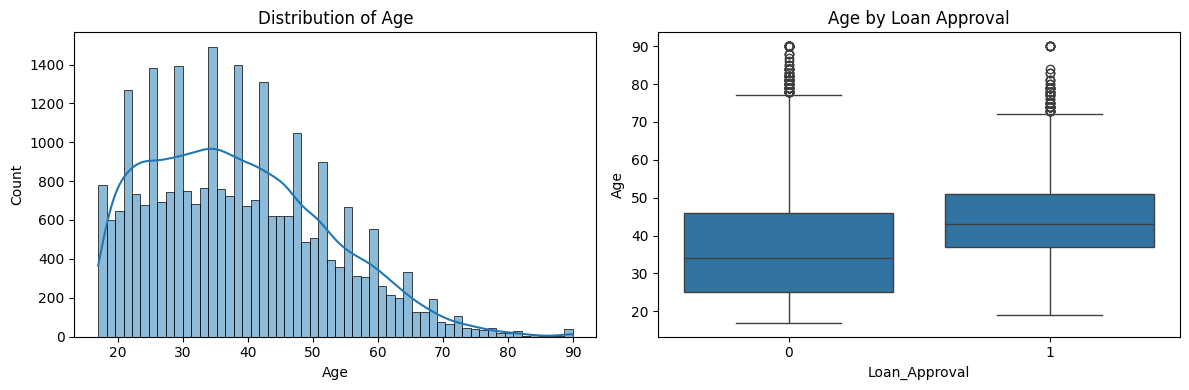

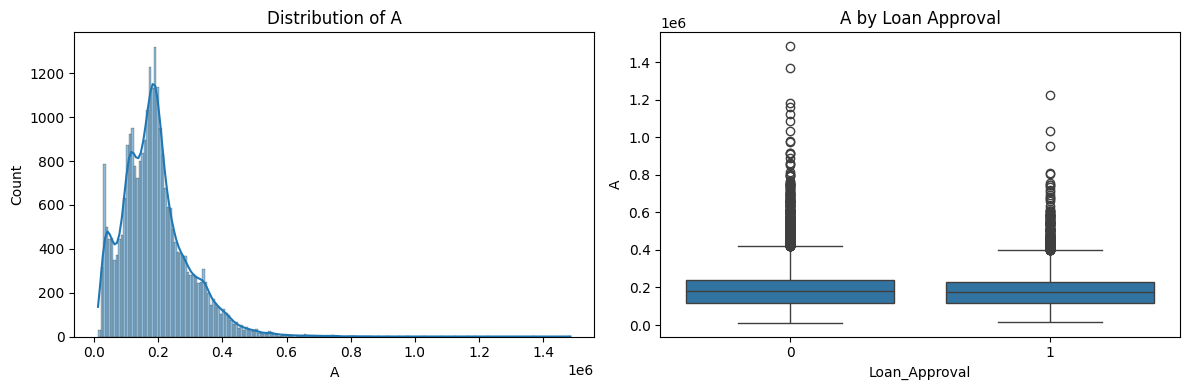

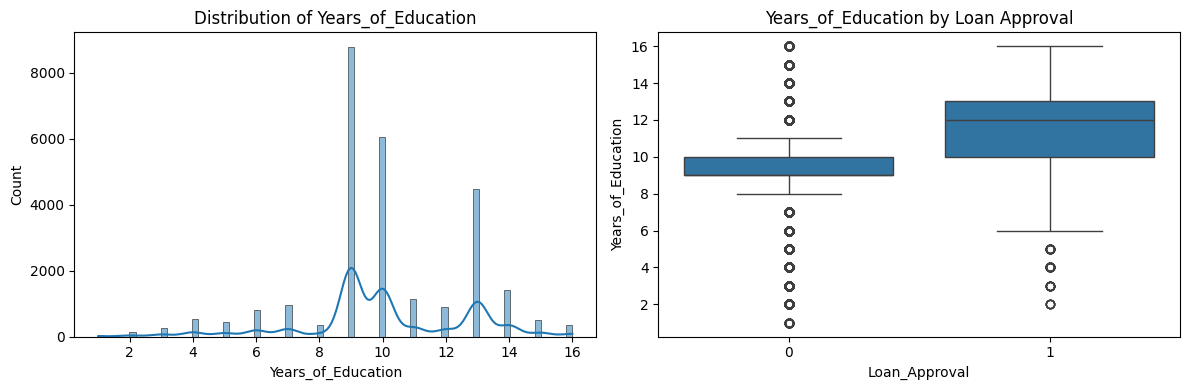

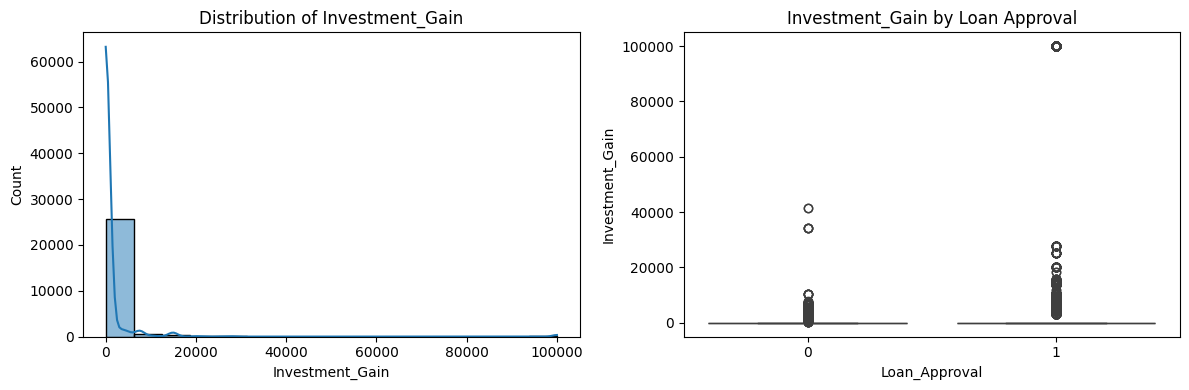

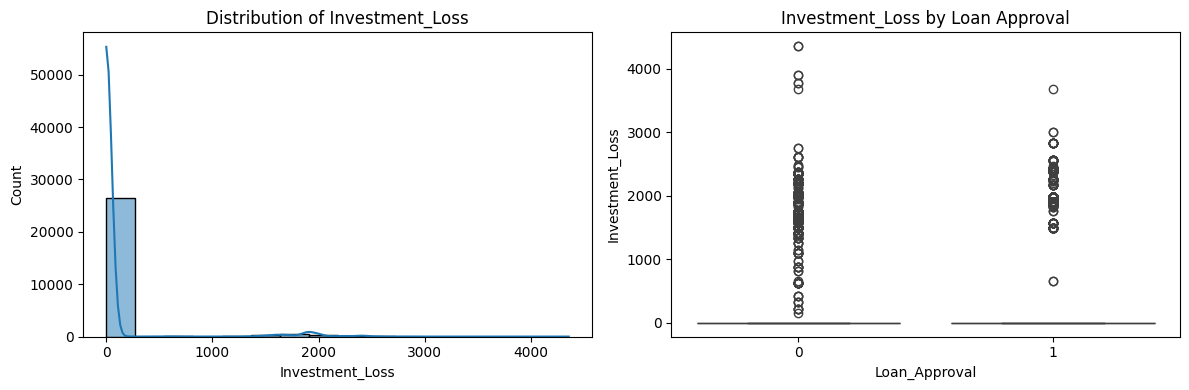

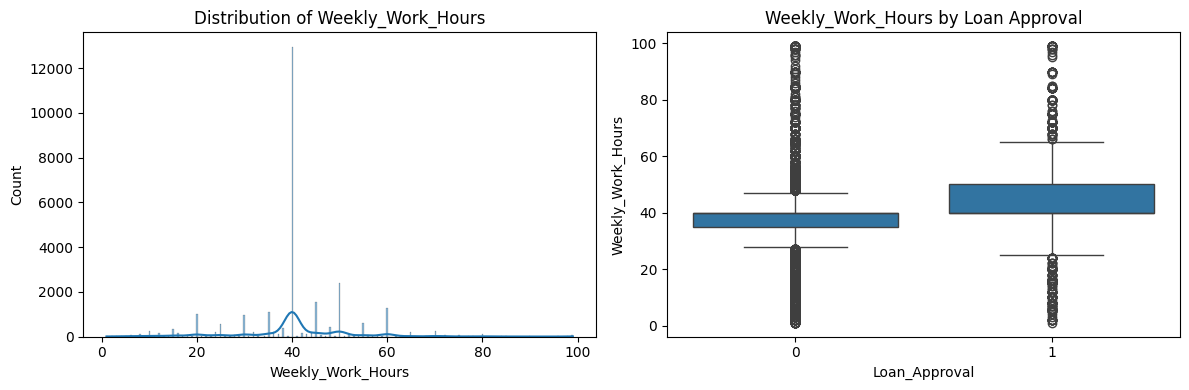

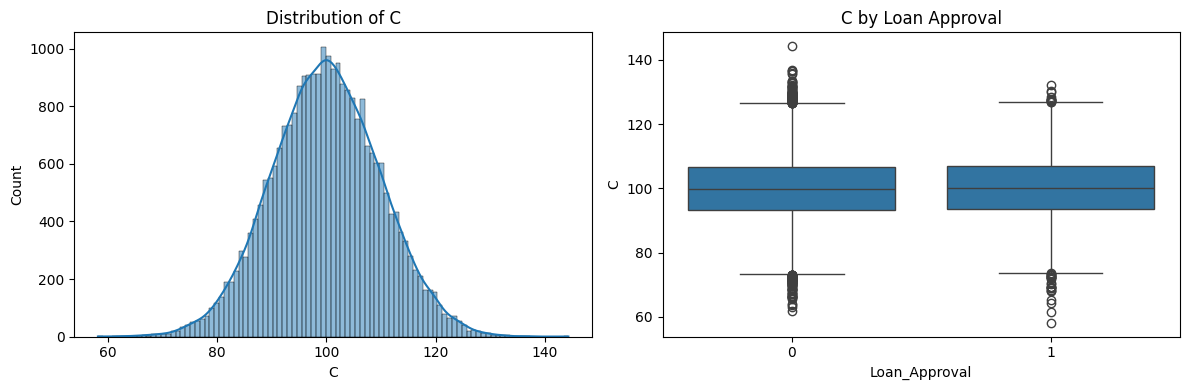

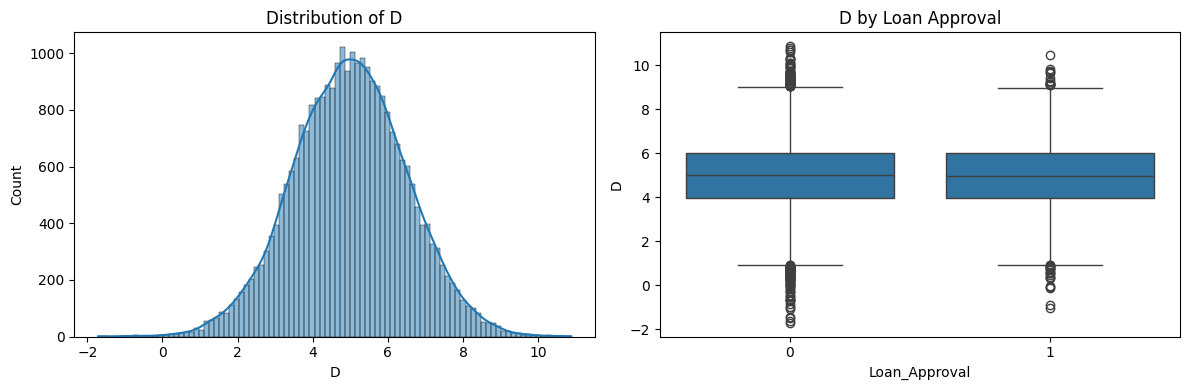

Skipping B: only one Loan Approval category present.


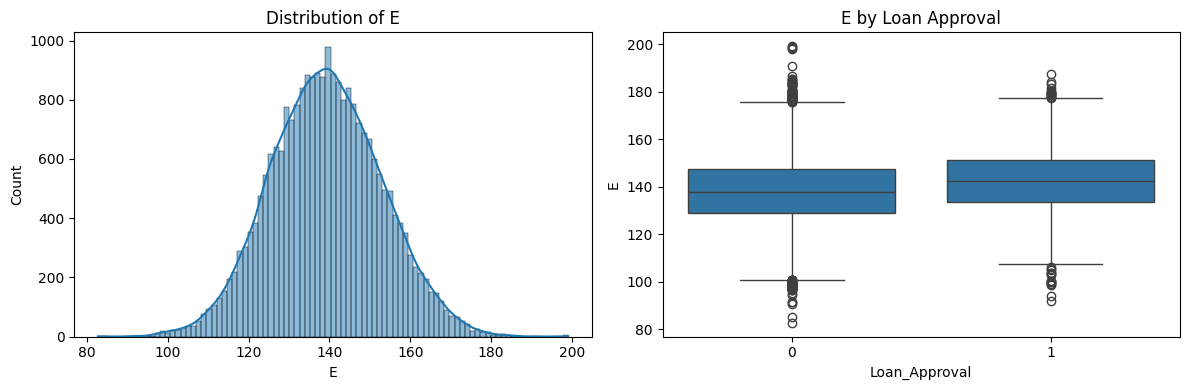

In [82]:
num_cols = (
    df_train
    .select_dtypes(include=["int64", "float64"])
    .drop(columns=["customer_id", target])
    .columns
)

for col in num_cols:
    # prepare a clean DataFrame for this feature
    df_plot = df_train[[target, col]].dropna()
    
    # skip if after dropna only one class exists
    if df_plot[target].nunique() < 2:
        print(f"Skipping {col}: only one Loan Approval category present.")
        continue

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df_plot[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Distribution of {col}")
    sns.boxplot(x=target, y=col, data=df_plot, ax=axes[1])
    axes[1].set_title(f"{col} by Loan Approval")
    plt.tight_layout()
    plt.show()

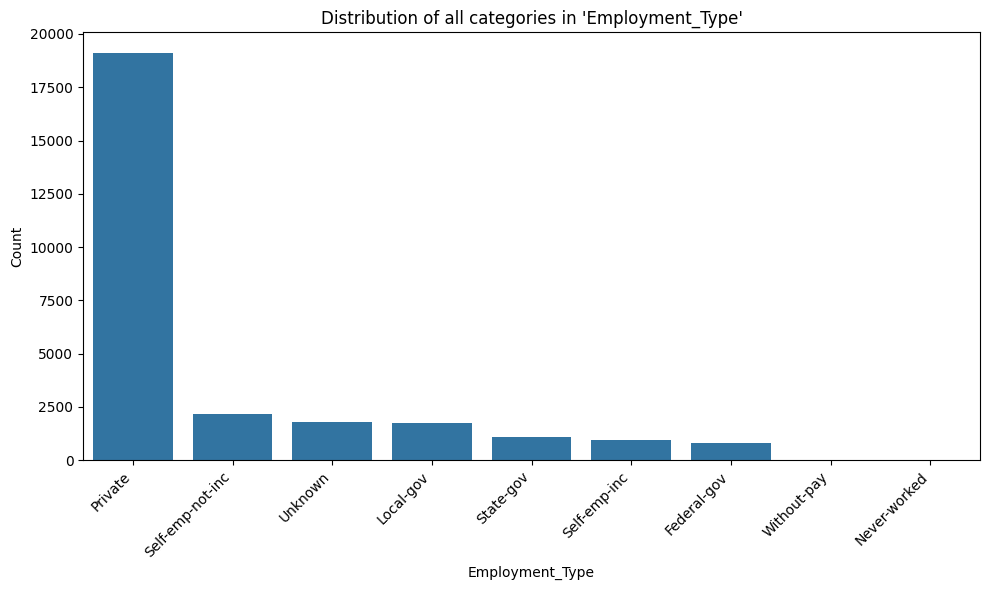


Approval Rate by Category for 'Employment_Type':


Employment_Type
Self-emp-inc        0.551541
Federal-gov         0.391909
Local-gov           0.300515
Self-emp-not-inc    0.292672
State-gov           0.263978
Private             0.216882
Unknown             0.134732
Never-worked        0.000000
Without-pay         0.000000
Name: Loan_Approval, dtype: float64

------------------------------------------------------------


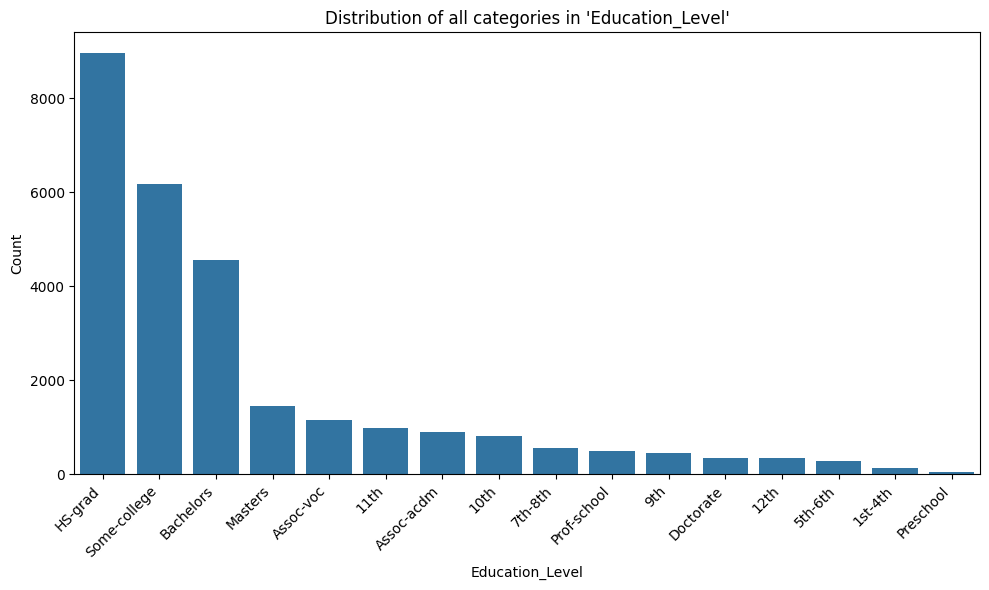


Approval Rate by Category for 'Education_Level':


Education_Level
Doctorate       0.735043
Prof-school     0.731855
Masters         0.564616
Bachelors       0.412733
Assoc-voc       0.268734
Assoc-acdm      0.246425
Some-college    0.190777
HS-grad         0.158682
12th            0.080692
10th            0.069939
7th-8th         0.062837
9th             0.054585
11th            0.050051
5th-6th         0.038869
1st-4th         0.035461
Preschool       0.000000
Name: Loan_Approval, dtype: float64

------------------------------------------------------------


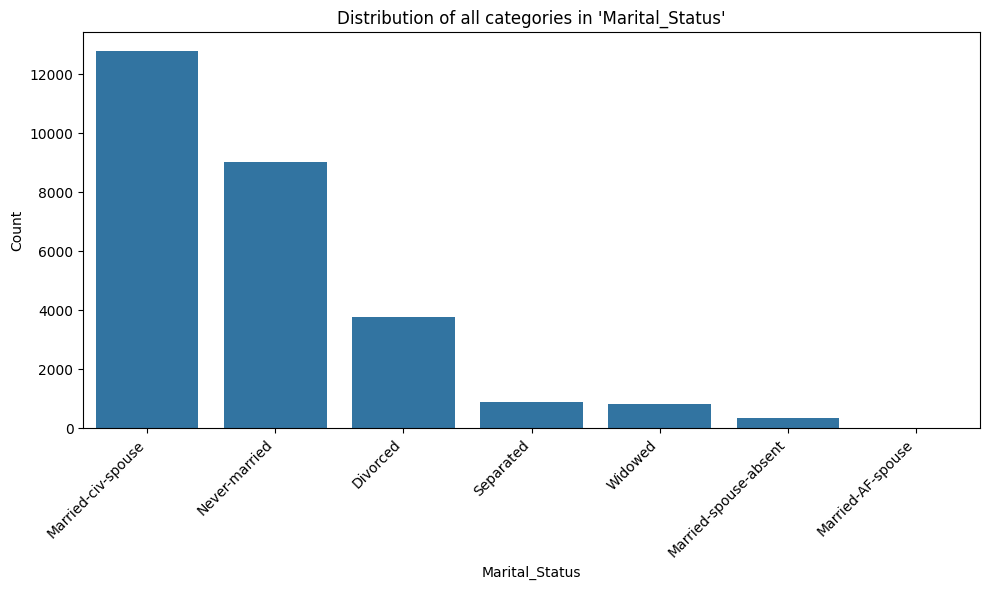


Approval Rate by Category for 'Marital_Status':


Marital_Status
Married-AF-spouse        0.450000
Married-civ-spouse       0.445305
Divorced                 0.106185
Widowed                  0.083933
Married-spouse-absent    0.083565
Separated                0.060296
Never-married            0.045480
Name: Loan_Approval, dtype: float64

------------------------------------------------------------


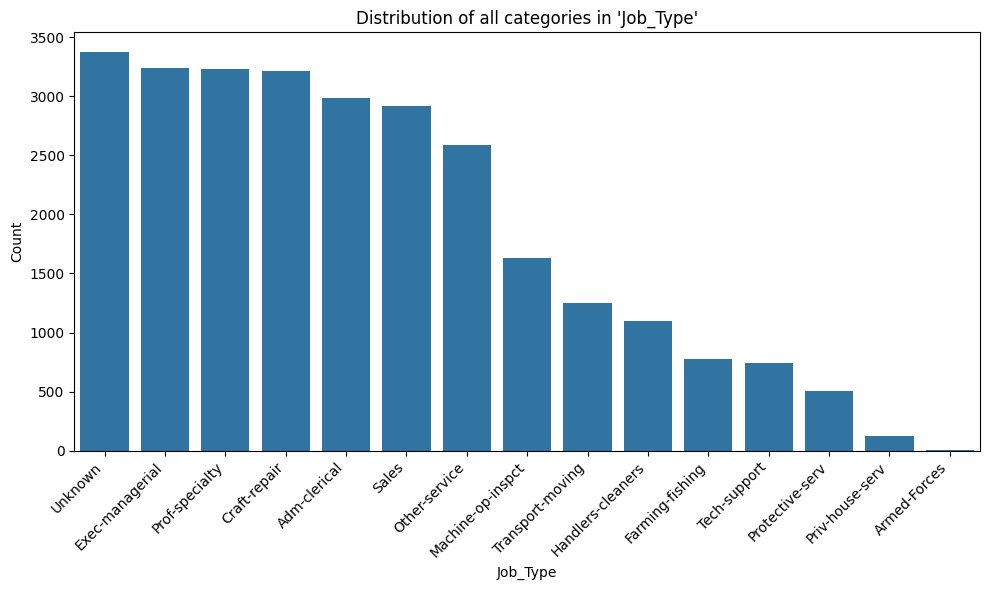


Approval Rate by Category for 'Job_Type':


Job_Type
Exec-managerial      0.482695
Prof-specialty       0.455614
Tech-support         0.318489
Protective-serv      0.316929
Sales                0.268016
Craft-repair         0.226268
Transport-moving     0.197600
Unknown              0.175319
Adm-clerical         0.137538
Armed-Forces         0.125000
Machine-op-inspct    0.122161
Farming-fishing      0.121795
Handlers-cleaners    0.061762
Other-service        0.043293
Priv-house-serv      0.008065
Name: Loan_Approval, dtype: float64

------------------------------------------------------------


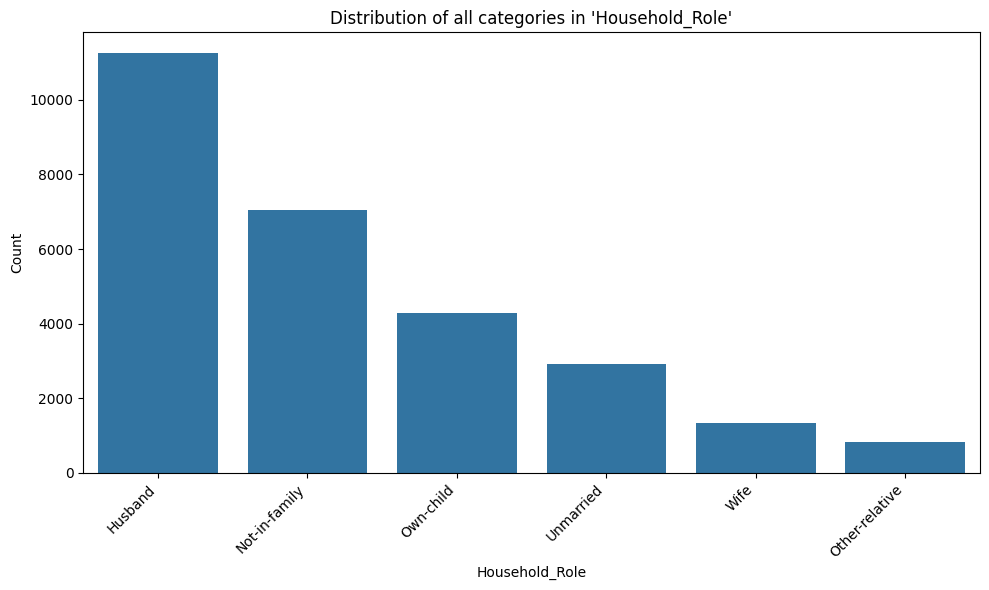


Approval Rate by Category for 'Household_Role':


Household_Role
Wife              0.478390
Husband           0.446568
Not-in-family     0.102041
Unmarried         0.064793
Other-relative    0.039427
Own-child         0.013330
Name: Loan_Approval, dtype: float64

------------------------------------------------------------


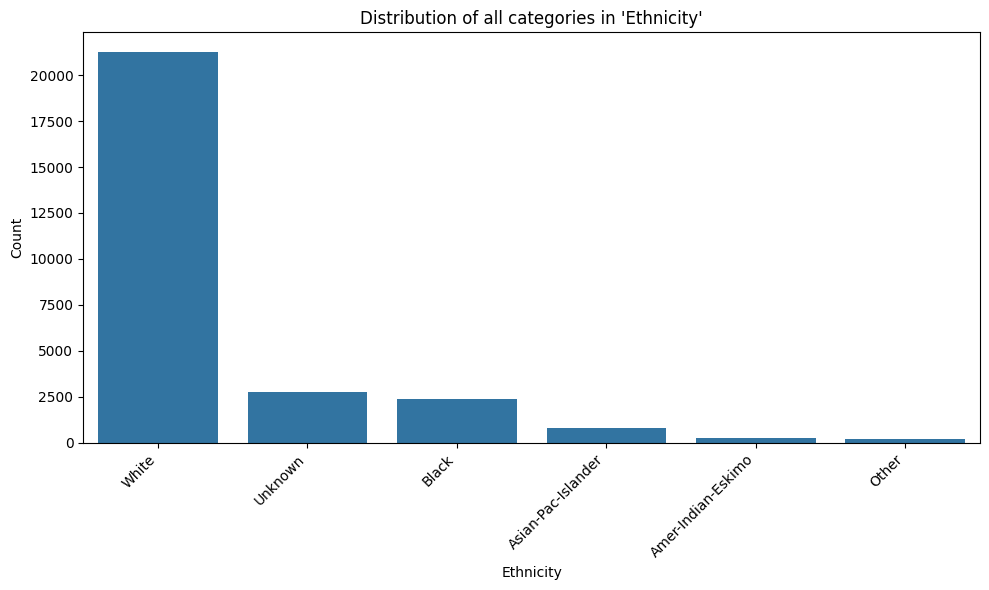


Approval Rate by Category for 'Ethnicity':


Ethnicity
White                 0.256430
Asian-Pac-Islander    0.254342
Unknown               0.236975
Amer-Indian-Eskimo    0.139442
Black                 0.125315
Other                 0.081731
Name: Loan_Approval, dtype: float64

------------------------------------------------------------


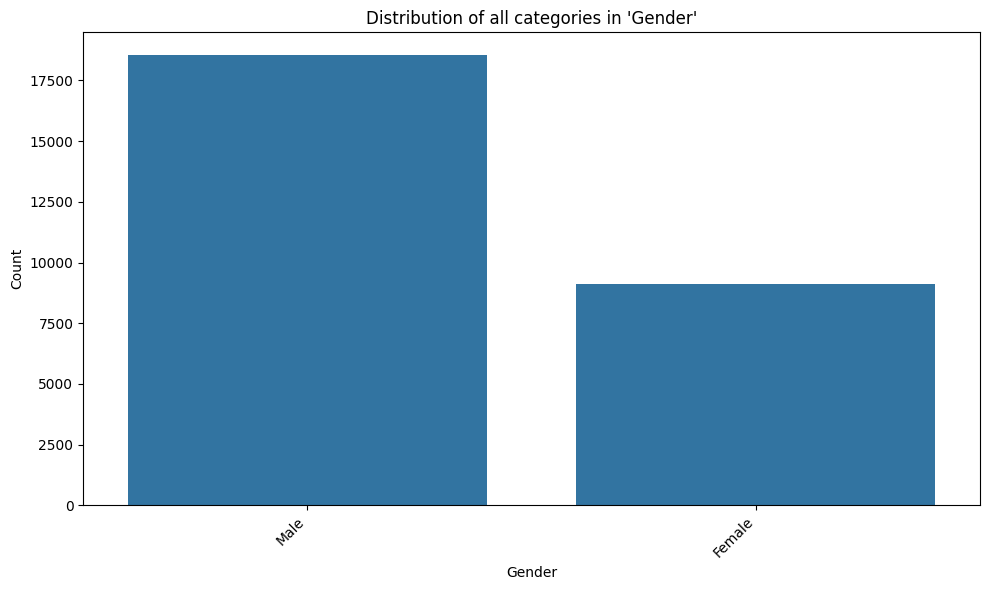


Approval Rate by Category for 'Gender':


Gender
Male      0.304948
Female    0.110283
Name: Loan_Approval, dtype: float64

------------------------------------------------------------


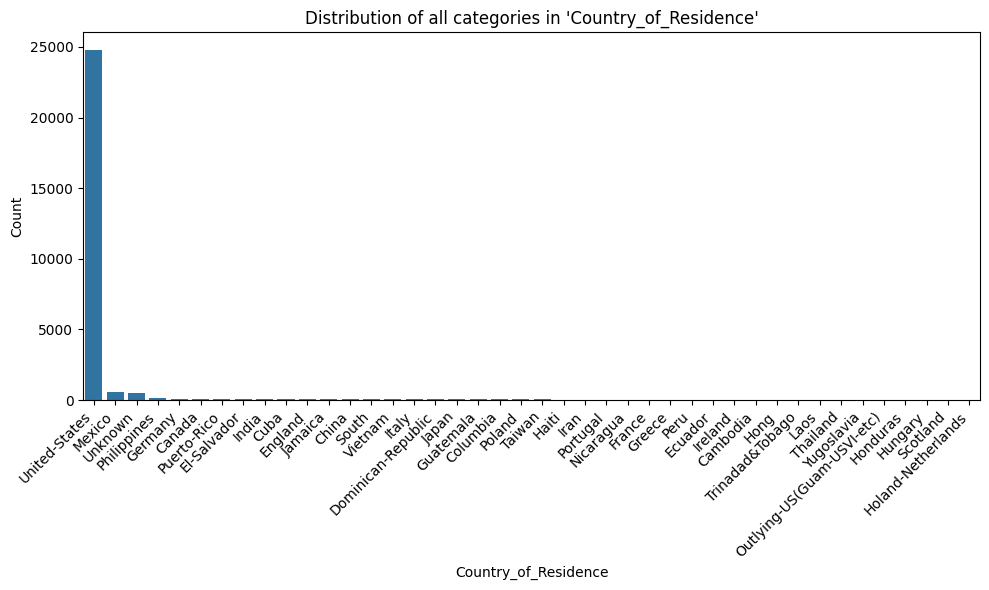


Approval Rate by Category for 'Country_of_Residence':


Country_of_Residence
France                        0.461538
Japan                         0.392857
Taiwan                        0.391304
Italy                         0.372881
Iran                          0.361111
India                         0.353659
Cambodia                      0.352941
Germany                       0.330357
England                       0.328947
Greece                        0.307692
Canada                        0.307692
Hungary                       0.300000
Cuba                          0.300000
Philippines                   0.299401
Hong                          0.294118
Yugoslavia                    0.285714
China                         0.268657
Ireland                       0.250000
United-States                 0.246238
Unknown                       0.241935
Scotland                      0.222222
Poland                        0.200000
Thailand                      0.187500
South                         0.179104
Ecuador                       0.125000
Port

------------------------------------------------------------


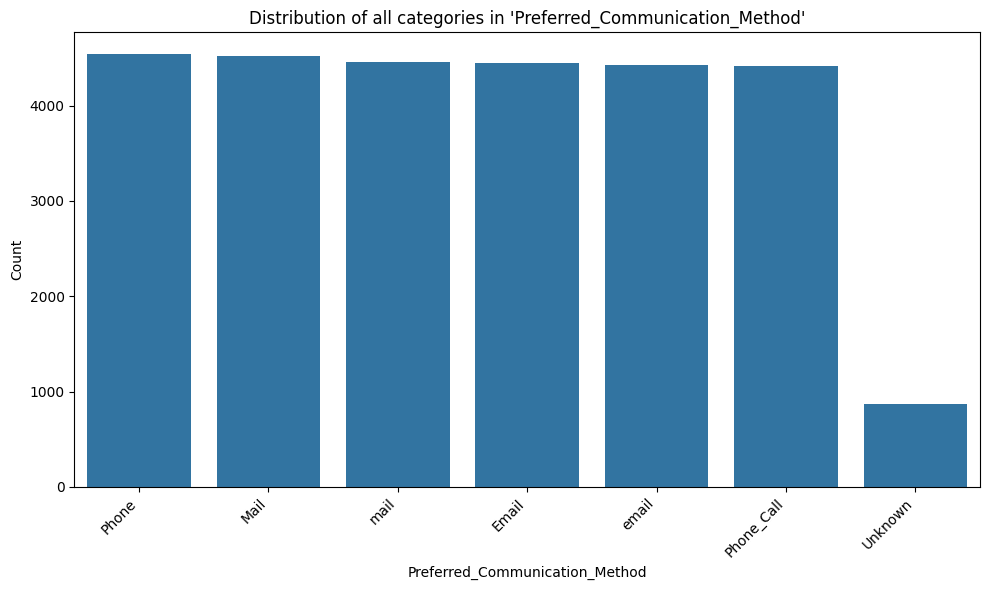


Approval Rate by Category for 'Preferred_Communication_Method':


Preferred_Communication_Method
Phone_Call    0.250735
mail          0.244953
Mail          0.244582
Email         0.240108
email         0.240054
Phone         0.228804
Unknown       0.218750
Name: Loan_Approval, dtype: float64

------------------------------------------------------------


In [114]:
for col in cat_cols:
    df_train[col] = df_train[col].fillna('Unknown').replace('?', 'Unknown')

# 2. Plot full distribution for each categorical feature
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index)
    plt.title(f"Distribution of all categories in '{col}'")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 3. Calculate and display approval rate for every category
    approval_rate = df_train.groupby(col)[target].mean().sort_values(ascending=False)
    print(f"\nApproval Rate by Category for '{col}':")
    display(approval_rate)
    print("-" * 60)

Correlation matrix:



,Age,A,Years_of_Education,Investment_Gain,Investment_Loss,Weekly_Work_Hours,C,D,B,E,Loan_Approval,Loan_Approval
Age,1.000000,-0.074876,0.030288,0.076650,0.058305,0.070756,-0.000196,-0.001403,NaN,0.495901,0.234235,0.234235
A,-0.074876,1.000000,-0.046667,0.003666,-0.009177,-0.021414,-0.007023,-0.000525,NaN,-0.046516,-0.011856,-0.011856
Years_of_Education,0.030288,-0.046667,1.000000,0.122591,0.084064,0.150396,0.008385,0.019633,NaN,0.021243,0.335097,0.335097
Investment_Gain,0.076650,0.003666,0.122591,1.000000,-0.031268,0.076027,0.007836,-0.003383,NaN,0.042580,0.223620,0.223620
Investment_Loss,0.058305,-0.009177,0.084064,-0.031268,1.000000,0.051090,0.000405,0.003614,NaN,0.031049,0.152074,0.152074
Weekly_Work_Hours,0.070756,-0.021414,0.150396,0.076027,0.051090,1.000000,-0.003450,0.000804,NaN,0.032650,0.226344,0.226344
C,-0.000196,-0.007023,0.008385,0.007836,0.000405,-0.003450,1.000000,-0.007877,NaN,0.867790,0.010044,0.010044
D,-0.001403,-0.000525,0.019633,-0.003383,0.003614,0.000804,-0.007877,1.000000,NaN,-0.006044,0.000003,0.000003
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,0.495901,-0.046516,0.021243,0.042580,0.031049,0.032650,0.867790,-0.006044,NaN,1.000000,0.124523,0.124523


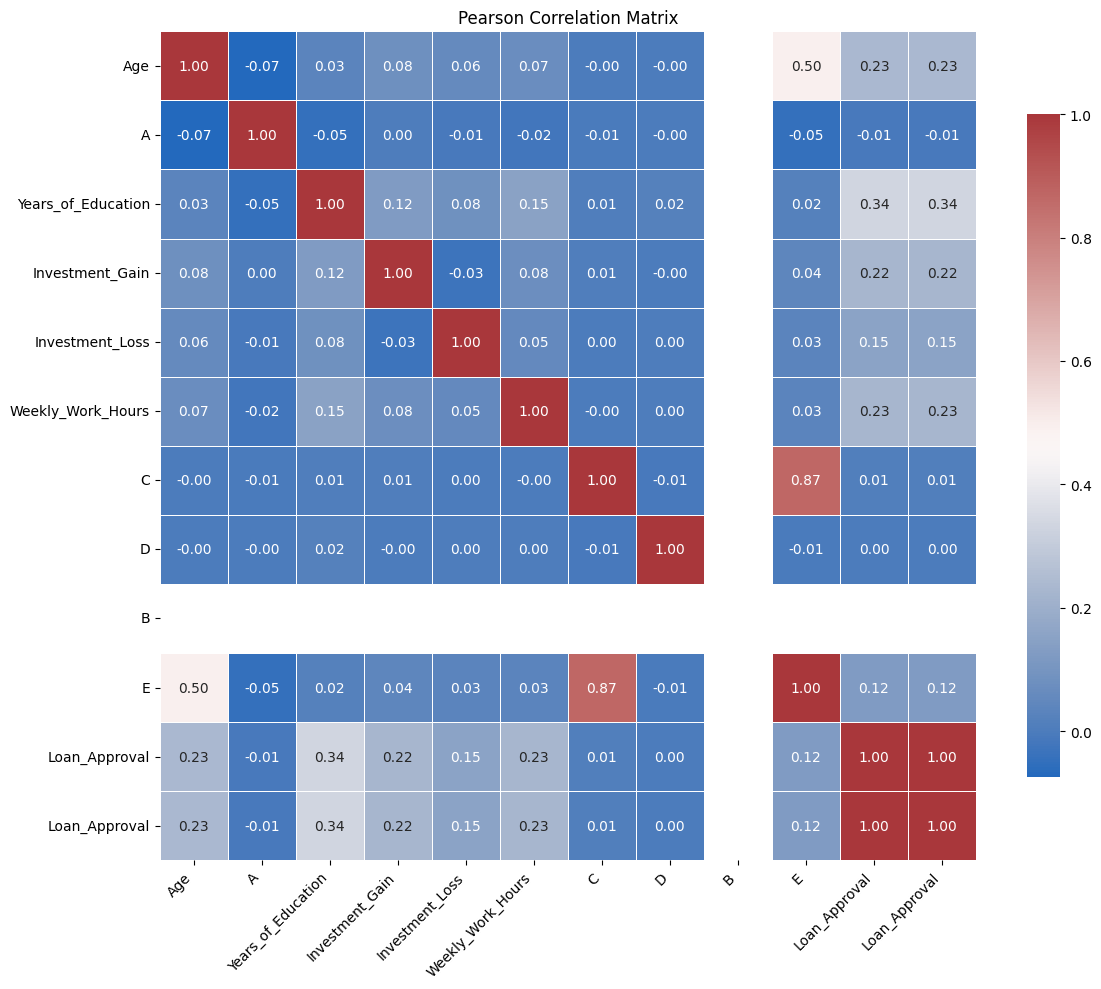

In [123]:
corr = df_train[num_cols + [target]].corr()

# 3. Display the raw matrix
print("Correlation matrix:\n")
display(corr)

# 4. Visualize as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="vlag",
    cbar_kws={"shrink": .8},
    linewidths=.5
)
plt.title("Pearson Correlation Matrix")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()